# Assignment 3: Autoregressive Moving Average Models

Tasks associated with this assignmnet are:
1. Load my dataset
2. Split into training and test sets
3. Fit the paramaters of the following models to the traning set:
    * AR(2)
    * ARMA(2,2)
4. Using test set, compare observed with AR(2) and ARMA(2,2) at the following lead times
    * 1 time steps ahead
    * 3 time steps ahead
    * 5 time steps ahead
5. Characterize the accuracy of the forcasts for each lead time and model
6. Comment on contrasting model approaches

## Load Libraries

In [45]:
import numpy as np # for math and stuff..
import pandas as pd # cause who doesn't like pandas... (read .csv)
import matplotlib.pyplot as plt # for plotting..
import scipy as sp # Need this and the below line to get functions to work
from scipy import signal # Has linear model function and one for detrending time series
import statsmodels.tsa.api as sm # Used for 

## Import, plot, and inspect data

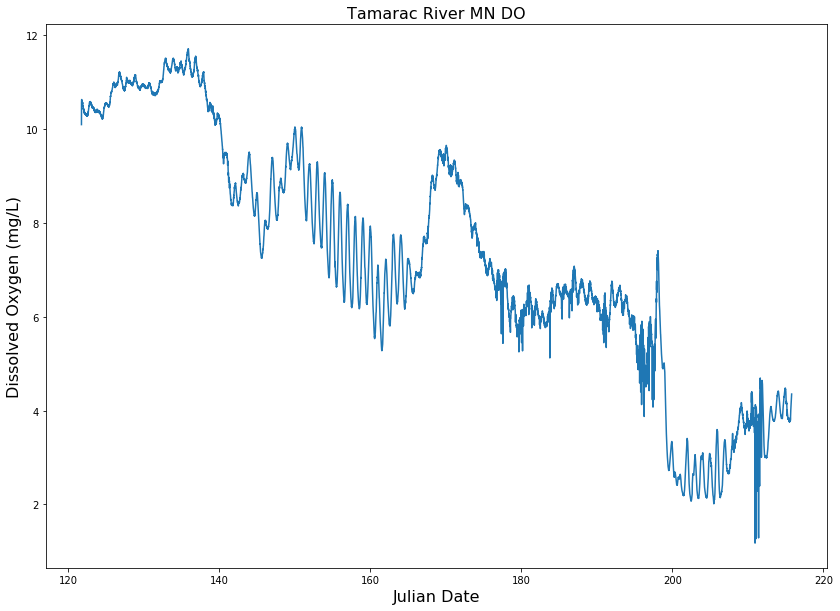

In [2]:
# Import data. 
df = pd.read_csv("TAM_DO_TEMP_SITE2.csv", sep=',')
# Create time series plot of DO concentrations as a function of Julian Date
plt.figure(figsize=(14,10))
plt.plot(df['Julian_Date'],df['DO']) 
plt.title('Tamarac River MN DO',fontsize=16)
plt.ylabel('Dissolved Oxygen (mg/L)',fontsize=16)
plt.xlabel('Julian Date',fontsize=16)
plt.show()

In [3]:
# print first and last 30 entries to check that data was loaded correctly
df

,time,bat,temp,DO,Q,day,Julian_Date
0,1459190640,3.50,5.728,10.099,0.974,16888.780556,121.780556
1,1459191540,3.49,4.141,10.569,0.985,16888.790972,121.790972
2,1459192440,3.48,4.081,10.612,0.987,16888.801389,121.801389
3,1459193340,3.48,4.131,10.634,0.988,16888.811806,121.811806
4,1459194240,3.48,4.263,10.598,0.987,16888.822222,121.822222
5,1459195140,3.48,4.394,10.603,0.987,16888.832639,121.832639
6,1459196040,3.48,4.465,10.612,0.988,16888.843056,121.843056
7,1459196940,3.48,4.555,10.594,0.987,16888.853472,121.853472
8,1459197840,3.48,4.676,10.571,0.986,16888.863889,121.863889
9,1459198740,3.48,4.746,10.592,0.988,16888.874306,121.874306


## Split data into training and test sets for cross validation

In [4]:
train = df[(df.Julian_Date < 160) | (df.Julian_Date >= 180)] # extract rows w/Julian_Date NOT between 160 & 180.. Training set
test = df[(df.Julian_Date >= 160) & (df.Julian_Date < 180)] # extract rows w/Julian_Date between 160 & 180.. Test set
dtrain = train['DO'].values # just DO values (array)
dtest  = test['DO'].values # just DO values (array)
DatesTest = test['Julian_Date'].values # Dates from test

## Examine Partial Autocorrelation Function

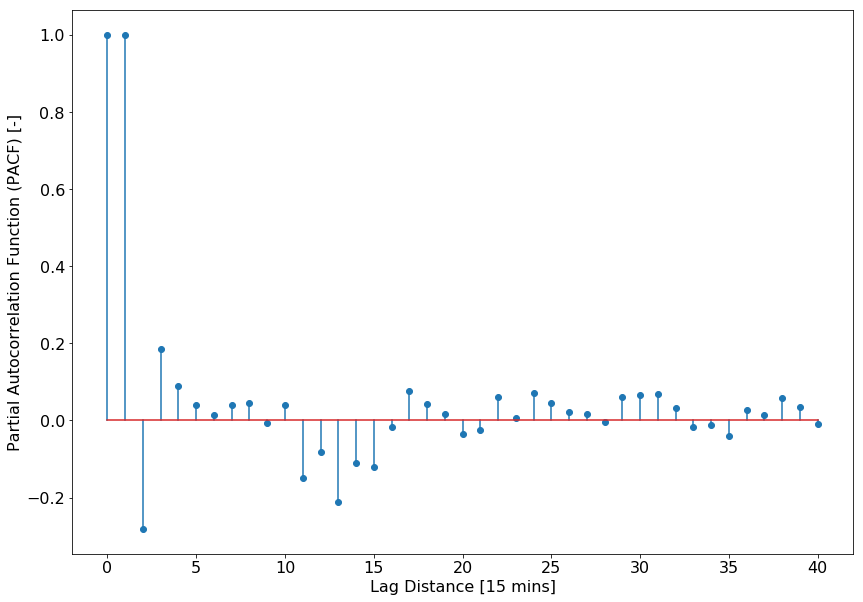

In [5]:
dt = pd.Series(train.DO.values, train.Julian_Date.values) # create a dataframe with only DO and Julian_Dates for the training set


PCF = sm.pacf(dtrain) # Calculate the partial autocorrelaion function

plt.figure(figsize=(14,10))
plt.stem(PCF)
plt.ylabel('Partial Autocorrelation Function (PACF) [-]',fontsize=16)
plt.xlabel('Lag Distance [15 mins]',fontsize=16)
ax = plt.gca()
ax.tick_params('both',labelsize=16)
plt.show()

##### First two lags carry the most predictive power

## AR(2) & ARMA(2,2) Models

In [6]:
# generate lags
Dttm1 = np.concatenate([dtrain[-2:-1],dtest[0:-1]]) # one time lag
Dttm2 = np.concatenate([dtrain[-3:-1],dtest[0:-2]]) # two time lags
Dttm1 = Dttm1.reshape(Dttm1.size,1)

Dttm2 = np.concatenate([dtrain[-3:-1],dtest[0:-2]])
Dttm2 = Dttm2.reshape(Dttm2.size,1)

In [7]:
# AR 2
DO_AR2 = sm.AR(dtrain).fit(2)
print(DO_AR2.params)

[ 0.00431308  1.25779618 -0.25848384]


In [8]:
# ARMA(2,2)
DO_ARMA_2_2 = sm.ARMA(dtrain-np.mean(dtrain),(2,2)).fit()
print(DO_ARMA_2_2.params)

[-0.00337031  1.60926007 -0.60943968 -0.34815356 -0.26706569]


### Make Predictions based on AR(2) and ARMA(2,2)

In [9]:
# AR(2)
AR2_mu   = DO_AR2.params[0]
AR2_phi1 = DO_AR2.params[1]
AR2_phi2 = DO_AR2.params[2]

DhatAR2 = AR2_mu + AR2_phi1*Dttm1 + AR2_phi2*Dttm2 # predictions

In [42]:
# ARMA(2,2)
ARMA22_mu     = DO_ARMA_2_2.params[0]
ARMA22_phi1   = DO_ARMA_2_2.params[1]
ARMA22_phi2   = DO_ARMA_2_2.params[2]
ARMA22_theta1 = DO_ARMA_2_2.params[3]
ARMA22_theta2 = DO_ARMA_2_2.params[4]


noise_std = 0.105 # standard deviation of AR(2) Error
etatm1 = np.random.normal(0.0,noise_std,(len(Dttm1),1))
etatm2 = np.concatenate([np.random.normal(0.0,noise_std,(2,1)),etatm1[0:-2]])

DhatARMA22 = ARMA22_mu + ARMA22_phi1*Dttm1 + ARMA22_phi2*Dttm2 - ARMA22_theta1*etatm1 - ARMA22_theta2*etatm2
etatm1[0:9,0]

array([-0.08467456,  0.09312732,  0.08809187, -0.13843698,  0.03653056,
       -0.00099372,  0.08846158,  0.27142075, -0.09180291])

### Display predictions and observations for the "Test" period at two different scales

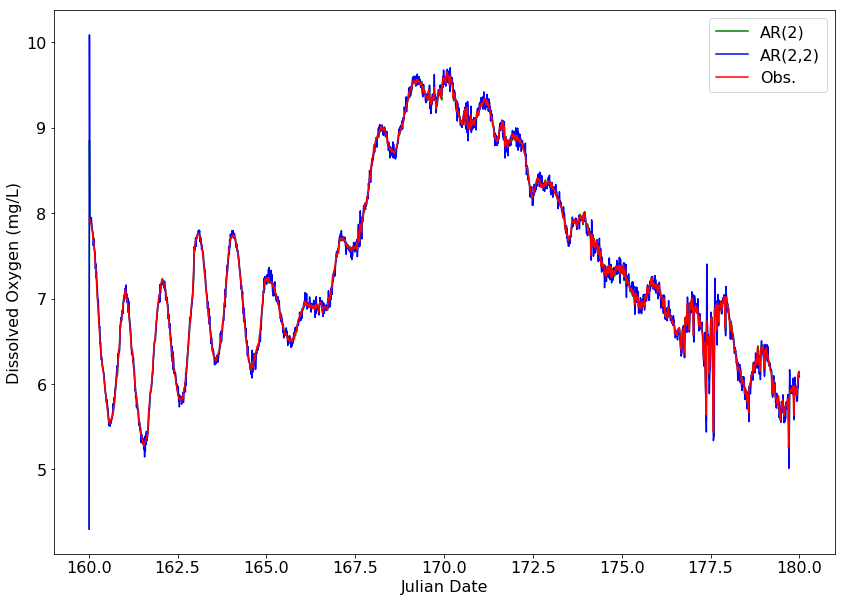

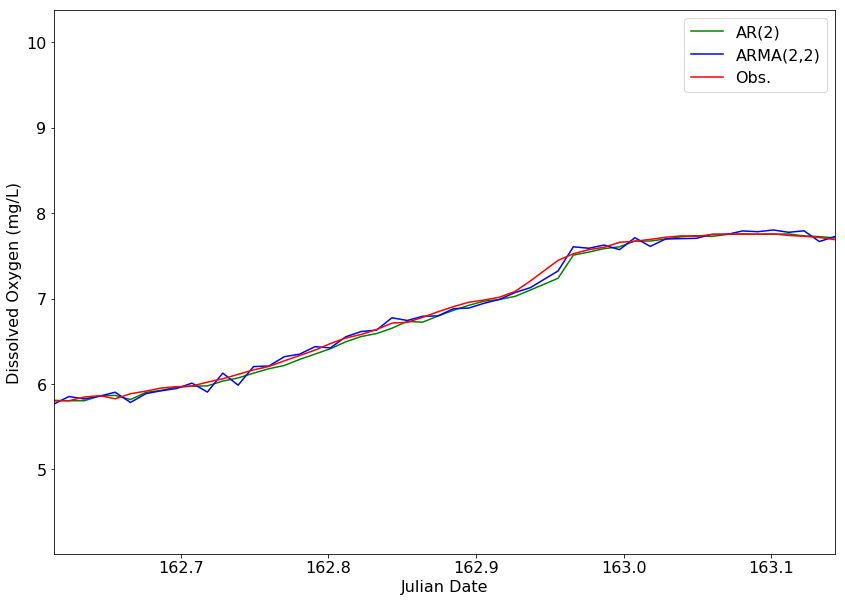

In [11]:
plt.figure(figsize=(14,10))

plt.plot(DatesTest,DhatAR2,'g-')
plt.plot(DatesTest,DhatARMA22,'b-')
plt.plot(DatesTest,dtest,'r-')
plt.ylabel('Dissolved Oxygen (mg/L)',fontsize=16)
plt.xlabel('Julian Date',fontsize=16)
plt.legend(('AR(2)','AR(2,2)','Obs.'),fontsize=16)
ax = plt.gca()
ax.tick_params('both',labelsize=16)
plt.show()

plt.figure(figsize=(14,10))

plt.plot(DatesTest,DhatAR2,'g-')
plt.plot(DatesTest,DhatARMA22,'b-')
plt.plot(DatesTest,dtest,'r-')
plt.xlim([DatesTest[250],DatesTest[300]])
plt.ylabel('Dissolved Oxygen (mg/L)',fontsize=16)
plt.xlabel('Julian Date',fontsize=16)
plt.legend(('AR(2)','ARMA(2,2)','Obs.'),fontsize=16)
ax = plt.gca()
ax.tick_params('both',labelsize=16)
plt.show()

### Compare predictions one time step in the future...

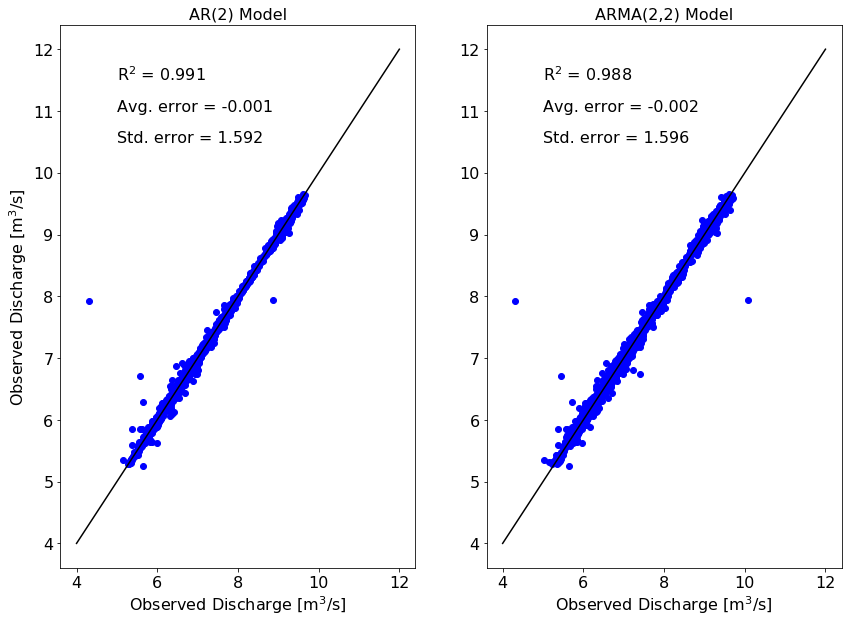

In [12]:
# Compute the R^2 values for each prediction 
R2AR2 = np.corrcoef(DhatAR2.T, dtest.T)**2
muAR2 = np.mean(DhatAR2 - dtest)
stdAR2 = np.std(DhatAR2 - dtest)

R2ARMA22  = np.corrcoef(DhatARMA22.T,dtest.T)**2
muARMA22  = np.mean(DhatARMA22-dtest)
stdARMA22 = np.std(DhatARMA22-dtest)


# Plot the ARMA(1,1) and ARMA(2,2) model results 
plt.figure(figsize=(14,10))
plt.subplot(121)
plt.plot(DhatAR2,dtest,'bo')
plt.plot([4, 12], [4, 12], 'k-')
plt.title('AR(2) Model',fontsize=16)
plt.ylabel('Observed Discharge [m${}^3$/s]',fontsize=16)
plt.xlabel('Observed Discharge [m${}^3$/s]',fontsize=16)
ax = plt.gca()
ax.tick_params('both',labelsize=16)
ax.annotate('R${}^2$ = %.3f'%R2AR2[0,1], xy=(5,11.5), fontsize=16)
ax.annotate('Avg. error = %.3f'%muAR2, xy=(5,11), fontsize=16)
ax.annotate('Std. error = %.3f'%stdAR2, xy=(5,10.5), fontsize=16)

plt.subplot(122)
plt.plot(DhatARMA22,dtest,'bo')
plt.plot([4, 12], [4, 12], 'k-')
plt.title('ARMA(2,2) Model',fontsize=16)
plt.xlabel('Observed Discharge [m${}^3$/s]',fontsize=16)
ax = plt.gca()
ax.tick_params('both',labelsize=16)
ax.annotate('R${}^2$ = %.3f'%R2ARMA22[0,1], xy=(5,11.5), fontsize=16)
ax.annotate('Avg. error = %.3f'%muARMA22, xy=(5,11), fontsize=16)
ax.annotate('Std. error = %.3f'%stdARMA22, xy=(5,10.5), fontsize=16)

plt.show()

### Make predictions up to five time steps out

In [13]:
# time steps up to 5, for ARMA(2)
DhatAR2 = AR2_mu + AR2_phi1*Dttm1 + AR2_phi2*Dttm2 # + 1 time step predictions
DhatAR2_2 = AR2_mu + AR2_phi1*Dttm2 + AR2_phi2*DhatAR2 # + 2 time step predictions
DhatAR2_3 = AR2_mu + AR2_phi1*DhatAR2 + AR2_phi2*DhatAR2_2 # + 3 time step predictions
DhatAR2_4 = AR2_mu + AR2_phi1*DhatAR2_2 + AR2_phi2*DhatAR2_3 # + 4 time step predictions
DhatAR2_5 = AR2_mu + AR2_phi1*DhatAR2_3 + AR2_phi2*DhatAR2_4 # + 5 time step predictions

# time steps up to 5, for ARMA(2,2)
DhatARMA22 = ARMA22_mu + ARMA22_phi1*Dttm1 + ARMA22_phi2*Dttm2 - ARMA22_theta1*etatm1 - ARMA22_theta2*etatm2 # + 1 time step predictions
DhatARMA22_2 = ARMA22_mu + ARMA22_phi1*Dttm2 + ARMA22_phi2*DhatARMA22 - ARMA22_theta1*etatm1 - ARMA22_theta2*etatm2 # + 2 time step predictions
DhatARMA22_3 = ARMA22_mu + ARMA22_phi1*DhatARMA22 + ARMA22_phi2*DhatARMA22_2 - ARMA22_theta1*etatm1 - ARMA22_theta2*etatm2 # + 3 time step predictions
DhatARMA22_4 = ARMA22_mu + ARMA22_phi1*DhatARMA22_2 + ARMA22_phi2*DhatARMA22_3 - ARMA22_theta1*etatm1 - ARMA22_theta2*etatm2 # + 4 time step predictions
DhatARMA22_5 = ARMA22_mu + ARMA22_phi1*DhatARMA22_3 + ARMA22_phi2*DhatARMA22_4 - ARMA22_theta1*etatm1 - ARMA22_theta2*etatm2 # + 5 time step predictions 

### Three time steps in the future ...

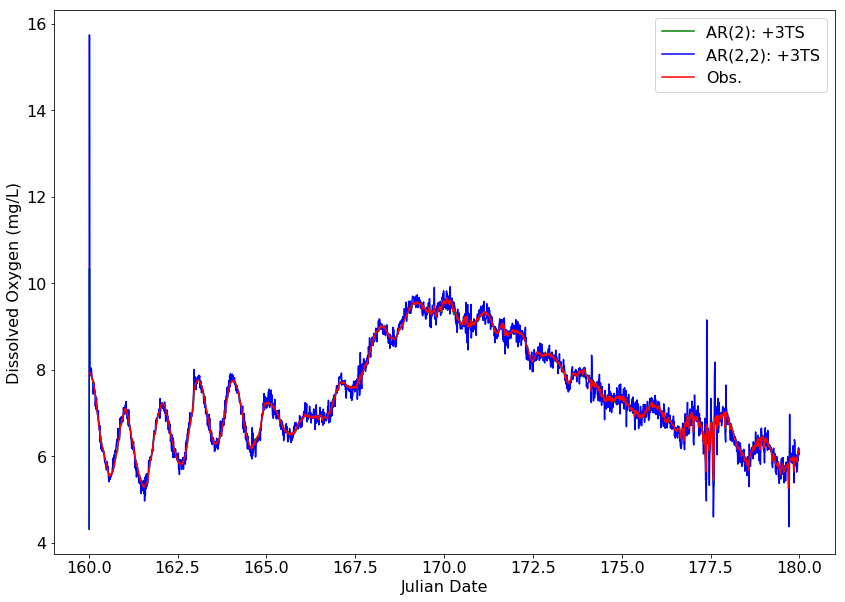

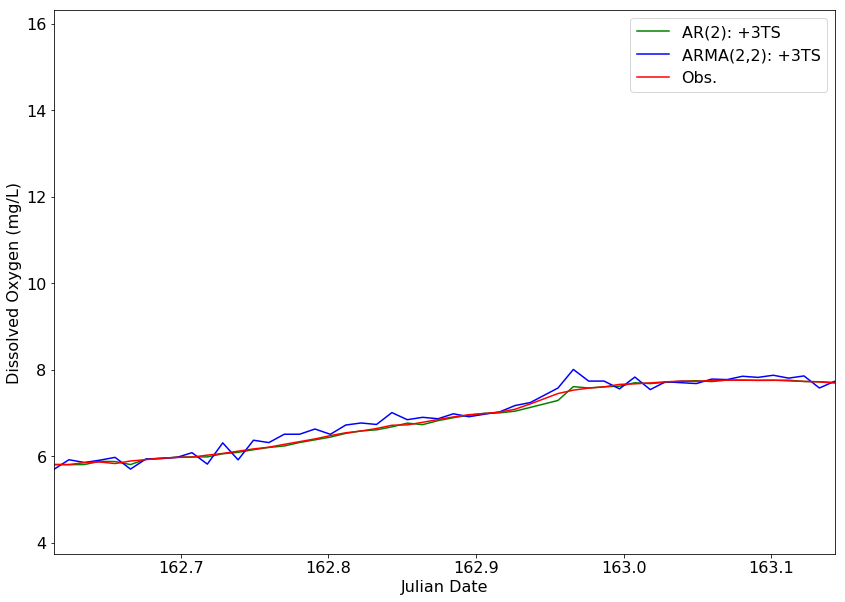

In [14]:
plt.figure(figsize=(14,10))

plt.plot(DatesTest,DhatAR2_3,'g-')
plt.plot(DatesTest,DhatARMA22_3,'b-')
plt.plot(DatesTest,dtest,'r-')
plt.ylabel('Dissolved Oxygen (mg/L)',fontsize=16)
plt.xlabel('Julian Date',fontsize=16)
plt.legend(('AR(2): +3TS','AR(2,2): +3TS','Obs.'),fontsize=16)
ax = plt.gca()
ax.tick_params('both',labelsize=16)
plt.show()

plt.figure(figsize=(14,10))

plt.plot(DatesTest,DhatAR2_3,'g-')
plt.plot(DatesTest,DhatARMA22_3,'b-')
plt.plot(DatesTest,dtest,'r-')
plt.xlim([DatesTest[250],DatesTest[300]])
plt.ylabel('Dissolved Oxygen (mg/L)',fontsize=16)
plt.xlabel('Julian Date',fontsize=16)
plt.legend(('AR(2): +3TS','ARMA(2,2): +3TS','Obs.'),fontsize=16)
ax = plt.gca()
ax.tick_params('both',labelsize=16)
plt.show()

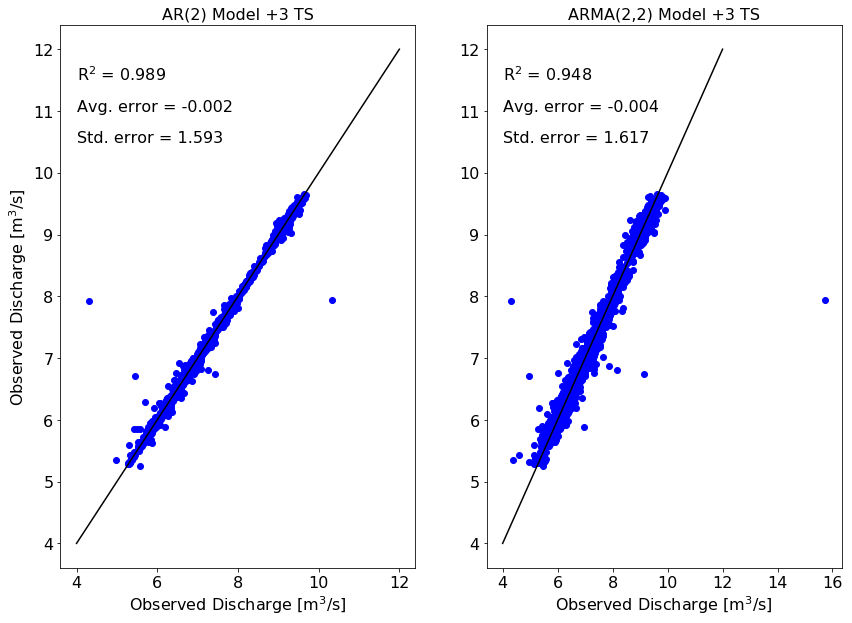

In [46]:
# Compute the R^2 values for each prediction 
R2AR2_3 = np.corrcoef(DhatAR2_3.T, dtest.T)**2
muAR2_3 = np.mean(DhatAR2_3 - dtest)
stdAR2_3 = np.std(DhatAR2_3 - dtest)

R2ARMA22_3  = np.corrcoef(DhatARMA22_3.T,dtest.T)**2
muARMA22_3  = np.mean(DhatARMA22_3-dtest)
stdARMA22_3 = np.std(DhatARMA22_3-dtest)


# Plot the ARMA(1,1) and ARMA(2,2) model results 
plt.figure(figsize=(14,10))
plt.subplot(121)
plt.plot(DhatAR2_3,dtest,'bo')
plt.plot([4, 12], [4, 12], 'k-')
plt.title('AR(2) Model +3 TS',fontsize=16)
plt.ylabel('Observed Discharge [m${}^3$/s]',fontsize=16)
plt.xlabel('Observed Discharge [m${}^3$/s]',fontsize=16)
ax = plt.gca()
ax.tick_params('both',labelsize=16)
ax.annotate('R${}^2$ = %.3f'%R2AR2_3[0,1], xy=(4,11.5), fontsize=16)
ax.annotate('Avg. error = %.3f'%muAR2_3, xy=(4,11), fontsize=16)
ax.annotate('Std. error = %.3f'%stdAR2_3, xy=(4,10.5), fontsize=16)

plt.subplot(122)
plt.plot(DhatARMA22_3,dtest,'bo')
plt.plot([4, 12], [4, 12], 'k-')
plt.title('ARMA(2,2) Model +3 TS',fontsize=16)
plt.xlabel('Observed Discharge [m${}^3$/s]',fontsize=16)
ax = plt.gca()
ax.tick_params('both',labelsize=16)
ax.annotate('R${}^2$ = %.3f'%R2ARMA22_3[0,1], xy=(4,11.5), fontsize=16)
ax.annotate('Avg. error = %.3f'%muARMA22_3, xy=(4,11), fontsize=16)
ax.annotate('Std. error = %.3f'%stdARMA22_3, xy=(4,10.5), fontsize=16)

plt.show()

### And five time steps in the future

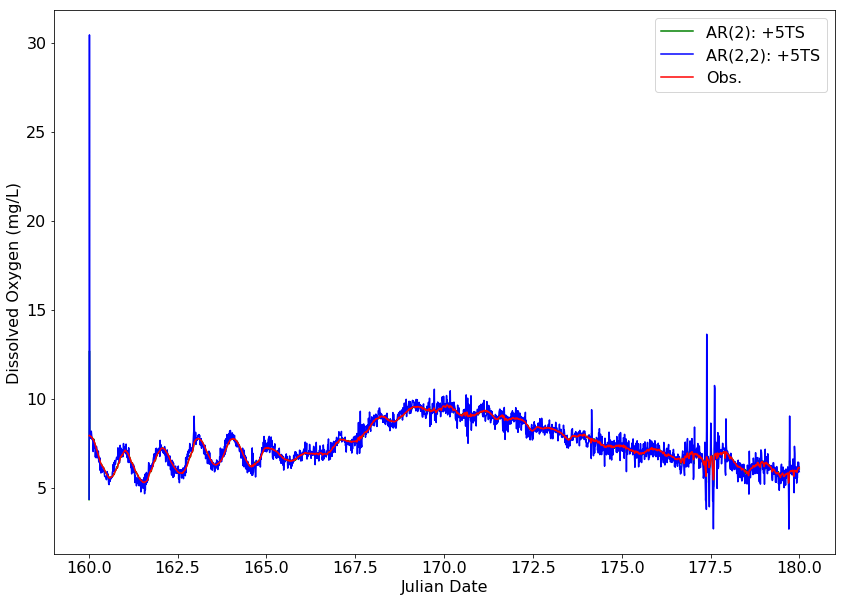

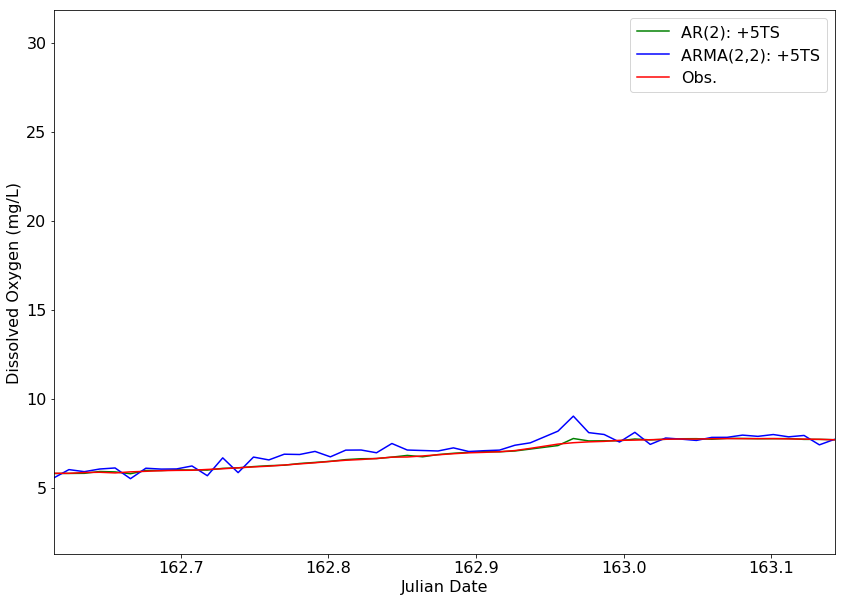

In [16]:
plt.figure(figsize=(14,10))

plt.plot(DatesTest,DhatAR2_5,'g-')
plt.plot(DatesTest,DhatARMA22_5,'b-')
plt.plot(DatesTest,dtest,'r-')
plt.ylabel('Dissolved Oxygen (mg/L)',fontsize=16)
plt.xlabel('Julian Date',fontsize=16)
plt.legend(('AR(2): +5TS','AR(2,2): +5TS','Obs.'),fontsize=16)
ax = plt.gca()
ax.tick_params('both',labelsize=16)
plt.show()

plt.figure(figsize=(14,10))

plt.plot(DatesTest,DhatAR2_5,'g-')
plt.plot(DatesTest,DhatARMA22_5,'b-')
plt.plot(DatesTest,dtest,'r-')
plt.xlim([DatesTest[250],DatesTest[300]])
plt.ylabel('Dissolved Oxygen (mg/L)',fontsize=16)
plt.xlabel('Julian Date',fontsize=16)
plt.legend(('AR(2): +5TS','ARMA(2,2): +5TS','Obs.'),fontsize=16)
ax = plt.gca()
ax.tick_params('both',labelsize=16)
plt.show()

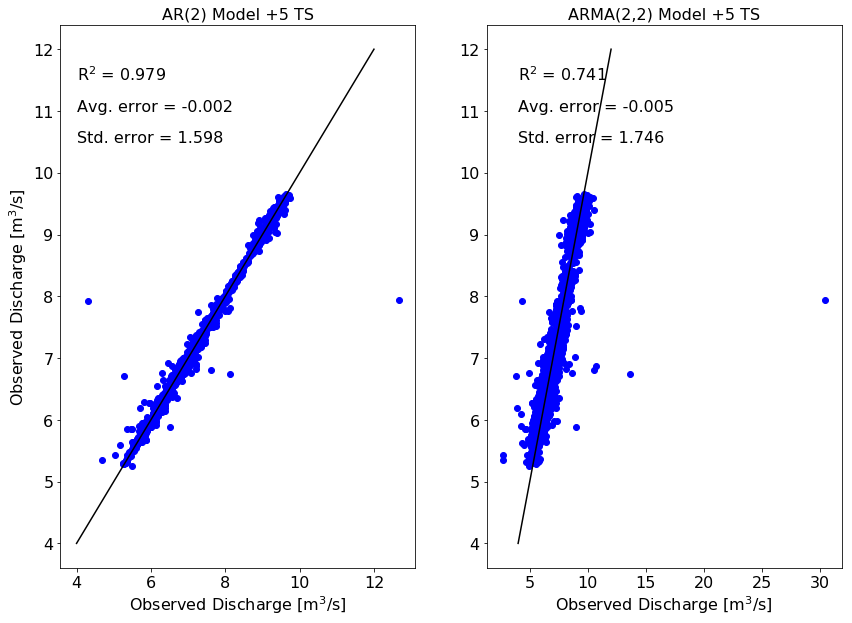

In [17]:
# Compute the R^2 values for each prediction 
R2AR2_5 = np.corrcoef(DhatAR2_5.T, dtest.T)**2
muAR2_5 = np.mean(DhatAR2_5 - dtest)
stdAR2_5 = np.std(DhatAR2_5 - dtest)

R2ARMA22_5  = np.corrcoef(DhatARMA22_5.T,dtest.T)**2
muARMA22_5  = np.mean(DhatARMA22_5-dtest)
stdARMA22_5 = np.std(DhatARMA22_5-dtest)


# Plot the ARMA(1,1) and ARMA(2,2) model results 
plt.figure(figsize=(14,10))
plt.subplot(121)
plt.plot(DhatAR2_5,dtest,'bo')
plt.plot([4, 12], [4, 12], 'k-')
plt.title('AR(2) Model +5 TS',fontsize=16)
plt.ylabel('Observed Discharge [m${}^3$/s]',fontsize=16)
plt.xlabel('Observed Discharge [m${}^3$/s]',fontsize=16)
ax = plt.gca()
ax.tick_params('both',labelsize=16)
ax.annotate('R${}^2$ = %.3f'%R2AR2_5[0,1], xy=(4,11.5), fontsize=16)
ax.annotate('Avg. error = %.3f'%muAR2_5, xy=(4,11), fontsize=16)
ax.annotate('Std. error = %.3f'%stdAR2_5, xy=(4,10.5), fontsize=16)

plt.subplot(122)
plt.plot(DhatARMA22_5,dtest,'bo')
plt.plot([4, 12], [4, 12], 'k-')
plt.title('ARMA(2,2) Model +5 TS',fontsize=16)
plt.xlabel('Observed Discharge [m${}^3$/s]',fontsize=16)
ax = plt.gca()
ax.tick_params('both',labelsize=16)
ax.annotate('R${}^2$ = %.3f'%R2ARMA22_5[0,1], xy=(4,11.5), fontsize=16)
ax.annotate('Avg. error = %.3f'%muARMA22_5, xy=(4,11), fontsize=16)
ax.annotate('Std. error = %.3f'%stdARMA22_5, xy=(4,10.5), fontsize=16)

plt.show()
# note that the 2nd panel is one-to-one but the extreme value at x ~ 30 stretches scale

### Model Comparisons

#### In general both the AR(2) and ARMA(2,2) perform better at fewer time steps in the future, unsurprisingly. This is because both models lose predictive power the further you extrapolate into the future. The AR models typicaly have better measures of error at each time step evaluated, this is not suprising considering the ARMA models include white noise terms. One major difference to note is that the further you extrapolate into the future the differences in error metrics between the two model types increases, however this difference may be attributed to one outlier having a large effect on error metrics (see point at x ~ 31 in the ARMA(2,2) + 5 TS figure).